<a href="https://colab.research.google.com/github/sundarp17/Recommendation-Systems/blob/main/machine_learning/model_based_collaborative_filtering_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVD Matrix Factorization**

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD

Preparing the data

In [3]:
#u.data
columns = ['user_id','item_id','rating','timestamp']
frame  = pd.read_csv('/content/u.data',sep='\t',names=columns)
frame.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
#u.item
columns = ['item_id','movie_title','release_date','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation',
            'Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
              'Thriller','War','Western']
movies_items = pd.read_csv('/content/u.item',sep='|',names=columns,encoding='latin-1')
movies_items.head()

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [5]:
movies = movies_items[['item_id','movie_title']]
movies.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
#combining both movie datasets

combined_movies_data = pd.merge(frame,movies,on='item_id')
combined_movies_data.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [8]:
order = combined_movies_data.groupby('item_id')['rating'].count().sort_values(ascending=False).head()
order

item_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

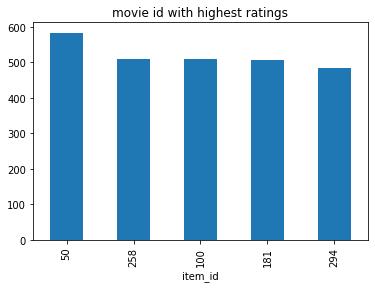

In [11]:
import matplotlib.pyplot as plt

order.plot.bar(title='movie id with highest ratings')
plt.show()

In [ ]:
#moviename with item id  = 50
filter = combined_movies_data['item_id']==50
combined_movies_data[filter]['movie_title'].unique()

array(['Star Wars (1977)'], dtype=object)

In [12]:
#moviename with item id  = 258
filter = combined_movies_data['item_id']==258
combined_movies_data[filter]['movie_title'].unique()

array(['Contact (1997)'], dtype=object)

In [13]:
#moviename with item id  = 100
filter = combined_movies_data['item_id']==100
combined_movies_data[filter]['movie_title'].unique()

array(['Fargo (1996)'], dtype=object)

In [14]:
#moviename with item id  = 181
filter = combined_movies_data['item_id']==181
combined_movies_data[filter]['movie_title'].unique()

array(['Return of the Jedi (1983)'], dtype=object)

In [15]:
#moviename with item id  = 294
filter = combined_movies_data['item_id']==294
combined_movies_data[filter]['movie_title'].unique()

array(['Liar Liar (1997)'], dtype=object)

**Building a Utility Matrix**

In [17]:
rating_crosstab = combined_movies_data.pivot_table(values='rating',columns='movie_title',index='user_id',fill_value=0)
rating_crosstab.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,2,5,0,0,3,4,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,4,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,5,0,0,0,0,3,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,4,0,0,0,0,4,0


**Transposing the matrix**

In [18]:
rating_crosstab.shape

(943, 1664)

In [19]:
x = rating_crosstab.values.T
x.shape

(1664, 943)

**Decomposing the matrix**

In [20]:
SVD = TruncatedSVD(n_components=12, random_state=17)
resultant_matrix = SVD.fit_transform(x)
resultant_matrix.shape

(1664, 12)

**Generating a corrleation matrix**

In [21]:
corr_matrix = np.corrcoef(resultant_matrix)
corr_matrix.shape

(1664, 1664)

**Isolating star wars from corrleation matrix**

In [22]:
movie_names = rating_crosstab.columns
movies_list = list(movie_names)
star_wars = movies_list.index('Star Wars (1977)')
print(star_wars)

1398


In [23]:
corr_star_wars = corr_matrix[star_wars]
corr_star_wars.shape

(1664,)

You can see that we have a vertical array of 1,664 rows, each of the rows contains a Pearson r coefficient that indicates how well each movie in the dataset correlates with Star Wars, based on user preferences.

**Recommending a highly correlated movie.**

In [24]:
list(movie_names[(corr_star_wars<1.0) & (corr_star_wars>0.9)])

['Die Hard (1988)',
 'Empire Strikes Back, The (1980)',
 'Fugitive, The (1993)',
 'Raiders of the Lost Ark (1981)',
 'Return of the Jedi (1983)',
 'Terminator 2: Judgment Day (1991)',
 'Terminator, The (1984)',
 'Toy Story (1995)']

In [33]:
new_list = corr_star_wars[(corr_star_wars<1.0) & (corr_star_wars>0.9)]
new_list

array([0.90862481, 0.92353282, 0.91514658, 0.92456262, 0.9881154 ,
       0.94198135, 0.93143966, 0.93476159])

In [34]:
movie_names = movie_names[(corr_star_wars<1.0) & (corr_star_wars>0.9)]
movie_names

Index(['Die Hard (1988)', 'Empire Strikes Back, The (1980)',
       'Fugitive, The (1993)', 'Raiders of the Lost Ark (1981)',
       'Return of the Jedi (1983)', 'Terminator 2: Judgment Day (1991)',
       'Terminator, The (1984)', 'Toy Story (1995)'],
      dtype='object', name='movie_title')

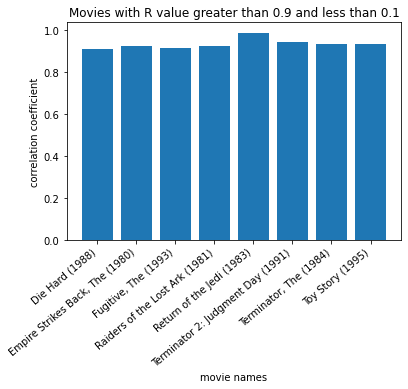

In [39]:
plt.bar(movie_names,new_list)
plt.title('Movies with R value greater than 0.9 and less than 0.1')
plt.xlabel('movie names')
plt.ylabel('correlation coefficient')
plt.xticks(rotation=40,ha='right')
plt.show()

In [25]:
list(movie_names[(corr_star_wars<1.0) & (corr_star_wars>0.95)])

['Return of the Jedi (1983)']